In [1]:
###purpose: plot RPM over block-exon-skipping-junctions
###input: output csv from get_junction_reads.py*
###output: Violine plot Figure 3D
###date: 04/28/2025


### * 1) run script 5 to get coordinates of exon-block flanking junctions
#      2) run get_junction_reads.py as follows:
#        python get_junction_reads.py --bam_dir path/to/aligned/reads/in/bam/format --junction_csv exon_block_coordinates_ups_dns.csv
#        --output_csv junction_coverage_results.csv --tolerance 5
            

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the data
data = pd.read_csv("junction_coverage_results.csv") 

In [3]:
# Identify rows where both mean_ctr_rpm and mean_kd_rpm are 0
non_zero_data = data[(data['mean_ctr_rpm'] != 0) | (data['mean_kd_rpm'] != 0)]

# Calculate the percentage of rows where at least one mean is not 0
percentage_non_zero = (len(non_zero_data) / len(data)) * 100

print(f"Percentage of rows where either 'mean_ctr_rpm' or 'mean_kd_rpm' is not 0: {percentage_non_zero:.2f}%")




Percentage of rows where either 'mean_ctr_rpm' or 'mean_kd_rpm' is not 0: 58.47%


/var/folders/s5/012b_sqx2bl9vk20cyklfj_r0000gn/T/ipykernel_74884/675760400.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


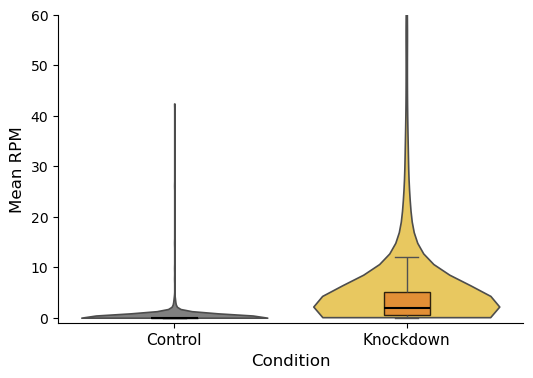

In [4]:
# Ensure necessary columns exist and rename if needed
if 'Control' not in non_zero_data.columns or 'Knockdown' not in non_zero_data.columns:
    non_zero_data = non_zero_data.rename(columns={'mean_ctr_rpm': 'Control', 'mean_kd_rpm': 'Knockdown'})

# Melt the DataFrame into long format for seaborn
melted_data = non_zero_data.melt(var_name='Condition', value_name='Mean RPM', value_vars=['Control', 'Knockdown'])

# Convert `Condition` to string to avoid type errors
melted_data['Condition'] = melted_data['Condition'].astype(str)

# Create the figure with a well-balanced aspect ratio
plt.figure(figsize=(6, 4))

# Violin plot with optimized density visualization
sns.violinplot(
    data=melted_data, 
    x='Condition', 
    y='Mean RPM', 
    palette={'Control': 'gray', 'Knockdown': '#FFD449'}, 
    inner=None, 
    cut=0, 
    linewidth=1.2
)

# Overlay boxplot with proper visibility
sns.boxplot(
    data=melted_data, 
    x='Condition', 
    y='Mean RPM', 
    width=0.2, 
    showfliers=False,  # Hides outliers to avoid clutter
    boxprops=dict(alpha=0.8, edgecolor="black"),  # Makes boxplot clear
    medianprops=dict(color="black", linewidth=1.5)  # Enhances median line
)

# **Set y-axis limits properly**
plt.ylim(-1, 60)
         # max(melted_data['Mean RPM']) * 1.1)

# # **Add a reference line at 0**
# plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Improve labels and formatting
plt.ylabel('Mean RPM', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.xticks(fontsize=11)

# Remove top and right spines for a cleaner look
sns.despine()

# # Save the plot at high resolution
plt.savefig('block_skipping_junctions_rpm_violin_boxplot.png', dpi=600)
plt.savefig('block_skipping_junctions_rpm_violin_boxplot.pdf', dpi=600)

# Show the plot
plt.show()


In [5]:
## Look at what percentage of reads spanning the ups_dns region have the block skipped
# Calculate mean and median
mean_value = non_zero_data["mean_percent_jr_kd"].mean()
median_value = non_zero_data["mean_percent_jr_kd"].median()

mean_value_2 = non_zero_data["mean_percent_jr_ctr"].mean()
median_value_2 = non_zero_data["mean_percent_jr_ctr"].median()

# Print results
print(f"Mean of mean_percent_jr_kd (non-zero values): {mean_value:.3f}")
print(f"Median of mean_percent_jr_kd (non-zero values): {median_value:.3f}")

print(f"Mean of mean_percent_jr_ctr (non-zero values): {mean_value_2:.3f}")
print(f"Median of mean_percent_jr_ctr (non-zero values): {median_value_2:.3f}")

Mean of mean_percent_jr_kd (non-zero values): 12.459
Median of mean_percent_jr_kd (non-zero values): 10.407
Mean of mean_percent_jr_ctr (non-zero values): 0.605
Median of mean_percent_jr_ctr (non-zero values): 0.000
